In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model

In [2]:
df_degrees = pd.read_csv('degrees-that-pay-back.csv')
df_degrees.head()
df_degrees_copy = df_degrees.copy()

In [3]:
df_college_salaries = pd.read_csv('salaries-by-college-type.csv')
df_college_salaries.head()
df_college_salaries_copy = df_college_salaries.copy()

In [4]:
df_region_salaries = pd.read_csv('salaries-by-region.csv')
df_region_salaries.head()
df_region_salaries_copy = df_region_salaries.copy()

In [5]:
df_degrees.describe()

,Percent change from Starting to Mid-Career Salary
count,50.000000
mean,69.274000
std,17.909908
min,23.400000
25%,59.125000
50%,67.800000
75%,82.425000
max,103.500000


In [6]:
df_degrees.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary',
       'Percent change from Starting to Mid-Career Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

In [7]:
#unique values from 'Undergraduate Major' column
df_degrees['Undergraduate Major'].unique()

array(['Accounting', 'Aerospace Engineering', 'Agriculture',
       'Anthropology', 'Architecture', 'Art History', 'Biology',
       'Business Management', 'Chemical Engineering', 'Chemistry',
       'Civil Engineering', 'Communications', 'Computer Engineering',
       'Computer Science', 'Construction', 'Criminal Justice', 'Drama',
       'Economics', 'Education', 'Electrical Engineering', 'English',
       'Film', 'Finance', 'Forestry', 'Geography', 'Geology',
       'Graphic Design', 'Health Care Administration', 'History',
       'Hospitality & Tourism', 'Industrial Engineering',
       'Information Technology (IT)', 'Interior Design',
       'International Relations', 'Journalism',
       'Management Information Systems (MIS)', 'Marketing', 'Math',
       'Mechanical Engineering', 'Music', 'Nursing', 'Nutrition',
       'Philosophy', 'Physician Assistant', 'Physics',
       'Political Science', 'Psychology', 'Religion', 'Sociology',
       'Spanish'], dtype=object)

In [8]:
#sort the dataframe by starting median salary ascending
df_degrees.sort_values(by=['Starting Median Salary'], inplace=True)

In [9]:
# convert 'Starting Median Salary' values from string to float
df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].str.replace('$','').str.replace(',','').astype(float)
# convert 'Starting Median Salary' values from float to integer
df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\4256191334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].str.replace('$','').str.replace(',','').astype(float)


In [10]:
#show converted values
df_degrees['Starting Median Salary'].head()

49    34000
47    34100
18    34900
15    35000
34    35600
Name: Starting Median Salary, dtype: int32

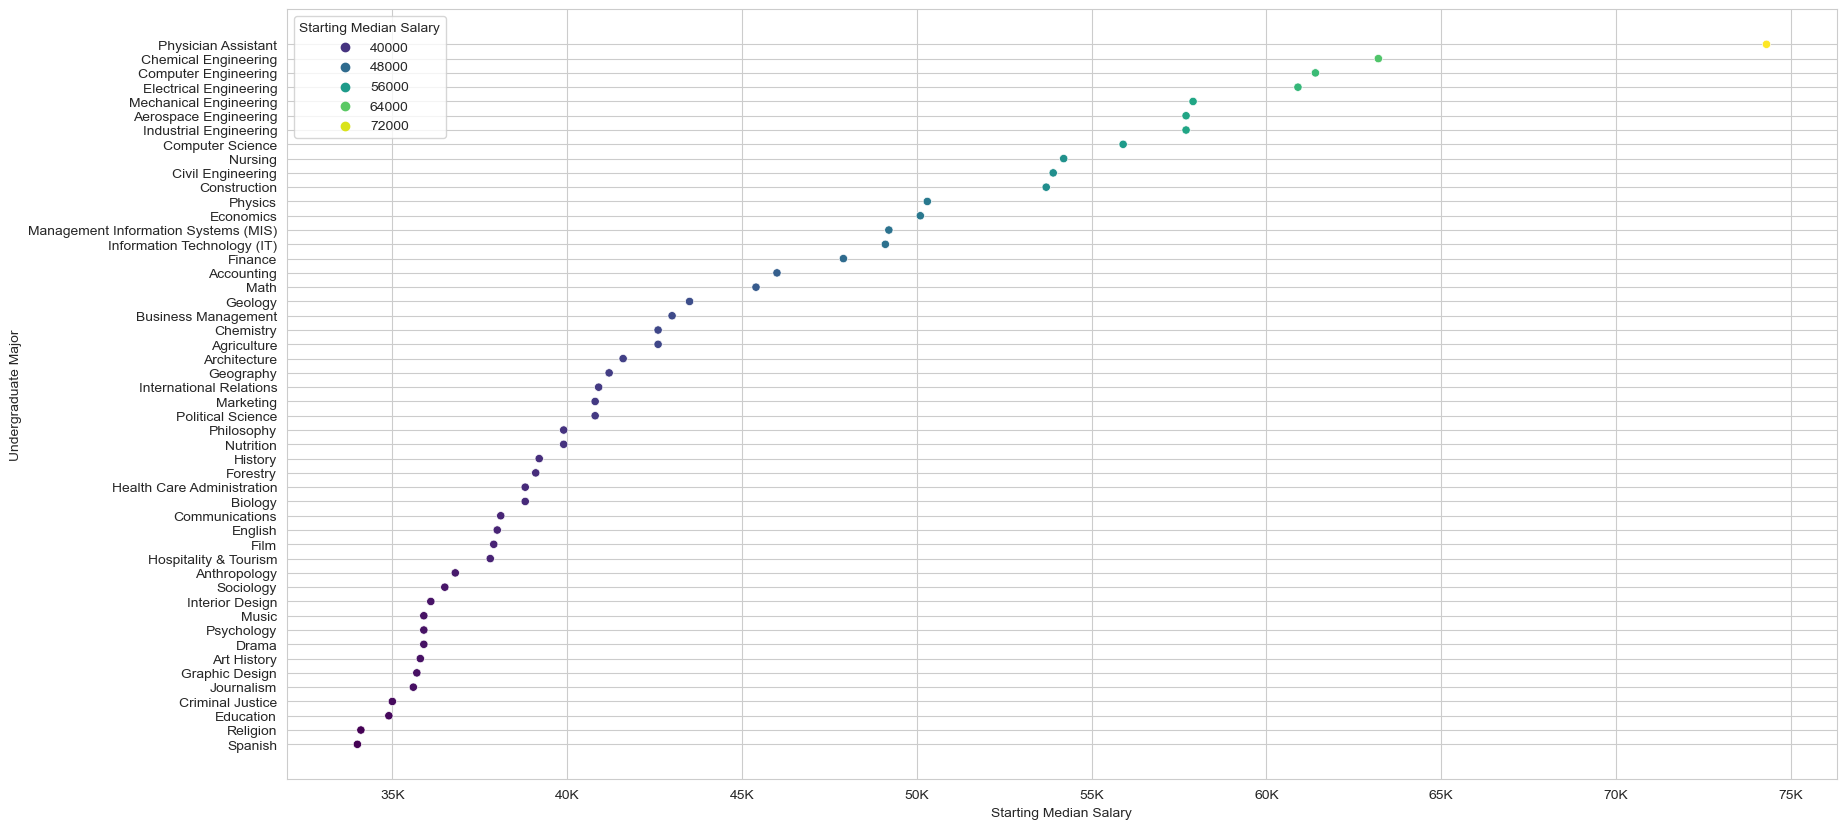

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def format_x_axis_labels(x, pos):
    return '{:.0f}K'.format(x/1000)

# Sort the DataFrame by "Starting Median Salary" in ascending order
df_degrees_sorted = df_degrees.sort_values(by="Starting Median Salary")

# Create the scatterplot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Starting Median Salary", y="Undergraduate Major", data=df_degrees_sorted, hue="Starting Median Salary", palette="viridis", ax=ax)

# Set the X axis label format to show values in overall thousands
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis_labels))

# Invert the y-axis to have lowest paying major at the bottom
ax.invert_yaxis()

# Show the plot
plt.show()

In [12]:
#show unique values from the df_region_salaries dataframe, from region column
df_region_salaries["Region"].unique()

array(['California', 'Western', 'Midwestern', 'Southern', 'Northeastern'],
      dtype=object)

In [13]:
# Filter the rows where 'Region' is 'California'
california_salaries = df_region_salaries[df_region_salaries['Region'] == 'California']

# Create a new DataFrame from the filtered results
df_california_salaries = california_salaries.copy()

df_california_salaries.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [14]:
# Filter the rows for different regions and create new DataFrames
western_salaries = df_region_salaries[df_region_salaries['Region'] == 'Western']
midwestern_salaries = df_region_salaries[df_region_salaries['Region'] == 'Midwestern']
southern_salaries = df_region_salaries[df_region_salaries['Region'] == 'Southern']
northeastern_salaries = df_region_salaries[df_region_salaries['Region'] == 'Northeastern']

# Create new DataFrames for each region
df_western_salaries = western_salaries.copy()
df_midwestern_salaries = midwestern_salaries.copy()
df_southern_salaries = southern_salaries.copy()
df_northeastern_salaries = northeastern_salaries.copy()

In [15]:
# Count NaN rows in 'Starting Median Salary' column for each region DataFrame
null_count_western = df_western_salaries['Starting Median Salary'].isna().sum()
null_count_midwestern = df_midwestern_salaries['Starting Median Salary'].isna().sum()
null_count_southern = df_southern_salaries['Starting Median Salary'].isna().sum()
null_count_northeastern = df_northeastern_salaries['Starting Median Salary'].isna().sum()
null_count_california = df_california_salaries['Starting Median Salary'].isna().sum()

print("Number of NaN rows in 'Starting Median Salary' column for Western Region:", null_count_western)
print("Number of NaN rows in 'Starting Median Salary' column for Midwestern Region:", null_count_midwestern)
print("Number of NaN rows in 'Starting Median Salary' column for Southern Region:", null_count_southern)
print("Number of NaN rows in 'Starting Median Salary' column for Northeastern Region:", null_count_northeastern)
print("Number of NaN rows in 'Starting Median Salary' column for California:", null_count_california)

Number of NaN rows in 'Starting Median Salary' column for Western Region: 0
Number of NaN rows in 'Starting Median Salary' column for Midwestern Region: 0
Number of NaN rows in 'Starting Median Salary' column for Southern Region: 0
Number of NaN rows in 'Starting Median Salary' column for Northeastern Region: 0
Number of NaN rows in 'Starting Median Salary' column for California: 0


In [16]:
# Data preprocessing steps
def preprocess_dataframe(df):
    df['Starting Median Salary'] = df['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
    df['Starting Median Salary'] = df['Starting Median Salary'].astype(int)
    return df

df_western_salaries = preprocess_dataframe(western_salaries.copy())
df_midwestern_salaries = preprocess_dataframe(midwestern_salaries.copy())
df_southern_salaries = preprocess_dataframe(southern_salaries.copy())
df_northeastern_salaries = preprocess_dataframe(northeastern_salaries.copy())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\367346242.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Starting Median Salary'] = df['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [17]:
# Data preprocessing steps
def preprocess_dataframe2(df):
    df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
    df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].astype(int)
    return df

df_western_salaries = preprocess_dataframe2(western_salaries.copy())
df_midwestern_salaries = preprocess_dataframe2(midwestern_salaries.copy())
df_southern_salaries = preprocess_dataframe2(southern_salaries.copy())
df_northeastern_salaries = preprocess_dataframe2(northeastern_salaries.copy())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\3566682875.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [18]:
#df_region_salaries_copy to be changed, df_degrees_copy to be changed
df_region_salaries_copy['Mid-Career Median Salary'] = df_region_salaries_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_region_salaries_copy['Mid-Career Median Salary'] = df_region_salaries_copy['Mid-Career Median Salary'].astype(int)

df_degrees_copy['Mid-Career Median Salary'] = df_degrees_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_degrees_copy['Mid-Career Median Salary'] = df_degrees_copy['Mid-Career Median Salary'].astype(int)

df_region_salaries_copy['Starting Median Salary'] = df_region_salaries_copy['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_region_salaries_copy['Starting Median Salary'] = df_region_salaries_copy['Starting Median Salary'].astype(int)

df_degrees_copy['Starting Median Salary'] = df_degrees_copy['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_degrees_copy['Starting Median Salary'] = df_degrees_copy['Starting Median Salary'].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\2728166675.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_region_salaries_copy['Mid-Career Median Salary'] = df_region_salaries_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\2728166675.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_degrees_copy['Mid-Career Median Salary'] = df_degrees_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\2728166675.py:8: FutureWarning: The default value of regex will change from Tru

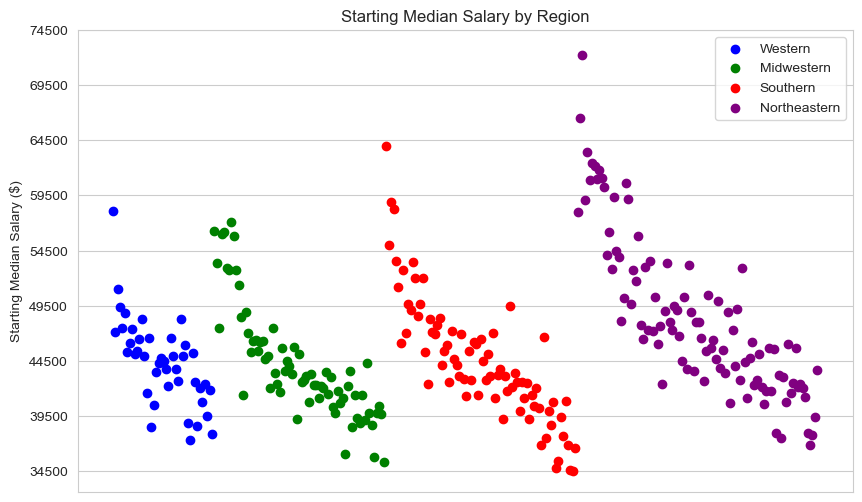

In [19]:
region_colors = {
    'Western': 'blue',
    'Midwestern': 'green',
    'Southern': 'red',
    'Northeastern': 'purple'
}

# Create the scatterplot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    region_data = df_region_salaries_copy[df_region_salaries_copy['Region'] == region]
    plt.scatter(region_data.index, region_data['Starting Median Salary'], label=region, color=color)

plt.ylabel('Starting Median Salary ($)')
plt.title('Starting Median Salary by Region')
plt.legend()

# Customize y-axis ticks
min_salary = df_region_salaries_copy['Starting Median Salary'].min()
max_salary = df_region_salaries_copy['Starting Median Salary'].max()
plt.yticks(range(min_salary, max_salary + 1, 5000))

# Remove x-axis ticks and labels
plt.xticks([])

plt.grid(True)
plt.show()

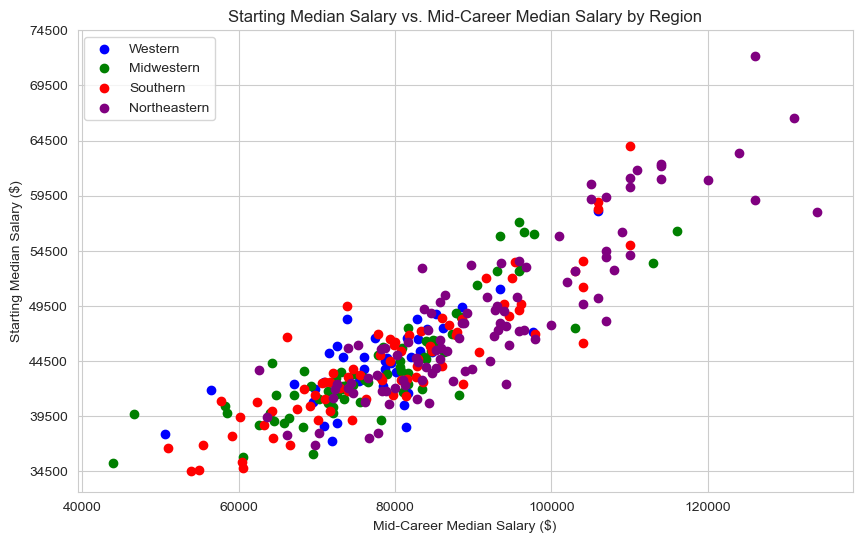

In [20]:
region_colors = {
    'Western': 'blue',
    'Midwestern': 'green',
    'Southern': 'red',
    'Northeastern': 'purple'
}

# Create the scatterplot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    region_data = df_region_salaries_copy[df_region_salaries_copy['Region'] == region]
    plt.scatter(region_data['Mid-Career Median Salary'], region_data['Starting Median Salary'], label=region, color=color)

plt.xlabel('Mid-Career Median Salary ($)')
plt.ylabel('Starting Median Salary ($)')
plt.title('Starting Median Salary vs. Mid-Career Median Salary by Region')
plt.legend()

# Customize y-axis ticks
min_salary = df_region_salaries_copy['Starting Median Salary'].min()
max_salary = df_region_salaries_copy['Starting Median Salary'].max()
plt.yticks(range(min_salary, max_salary + 1, 5000))

plt.grid(True)
plt.show()

In [21]:
df_region_salaries_model = df_region_salaries_copy.copy()

In [22]:
#drop nan values from the dataset
df_region_salaries_model.dropna(inplace=True)

#drop schoolname column
df_region_salaries_model.drop(columns=['School Name'], inplace=True)

In [23]:
# Preprocess other columns similarly
percentile_columns = ["Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", 
                     "Mid-Career 90th Percentile Salary", "Mid-Career 75th Percentile Salary"]

for column in percentile_columns:
    df_region_salaries_model[column] = df_region_salaries_model[column].str.replace('$', '').str.replace(',', '').astype(float)
    df_region_salaries_model[column] = df_region_salaries_model[column].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8704\2965421022.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_region_salaries_model[column] = df_region_salaries_model[column].str.replace('$', '').str.replace(',', '').astype(float)


In [26]:
#set X and y values for model
X = df_region_salaries_model.drop(columns=['Region'])
y = df_region_salaries_model['Region']

#split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(218, 6)
(55, 6)
(218,)
(55,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2727272727272727


In [29]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.2727272727272727

In [30]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.21818181818181817

In [ ]:
#with this little data it's hard to train a model that can predict the result